In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_csv("C:/Users/Gera/Desktop/something/datasets/data/titanic_train.csv" , index_col = 'PassengerId')

In [4]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [5]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


Построим попарные зависимости 

In [6]:
%config InlineBackend.figure_format = 'png' 

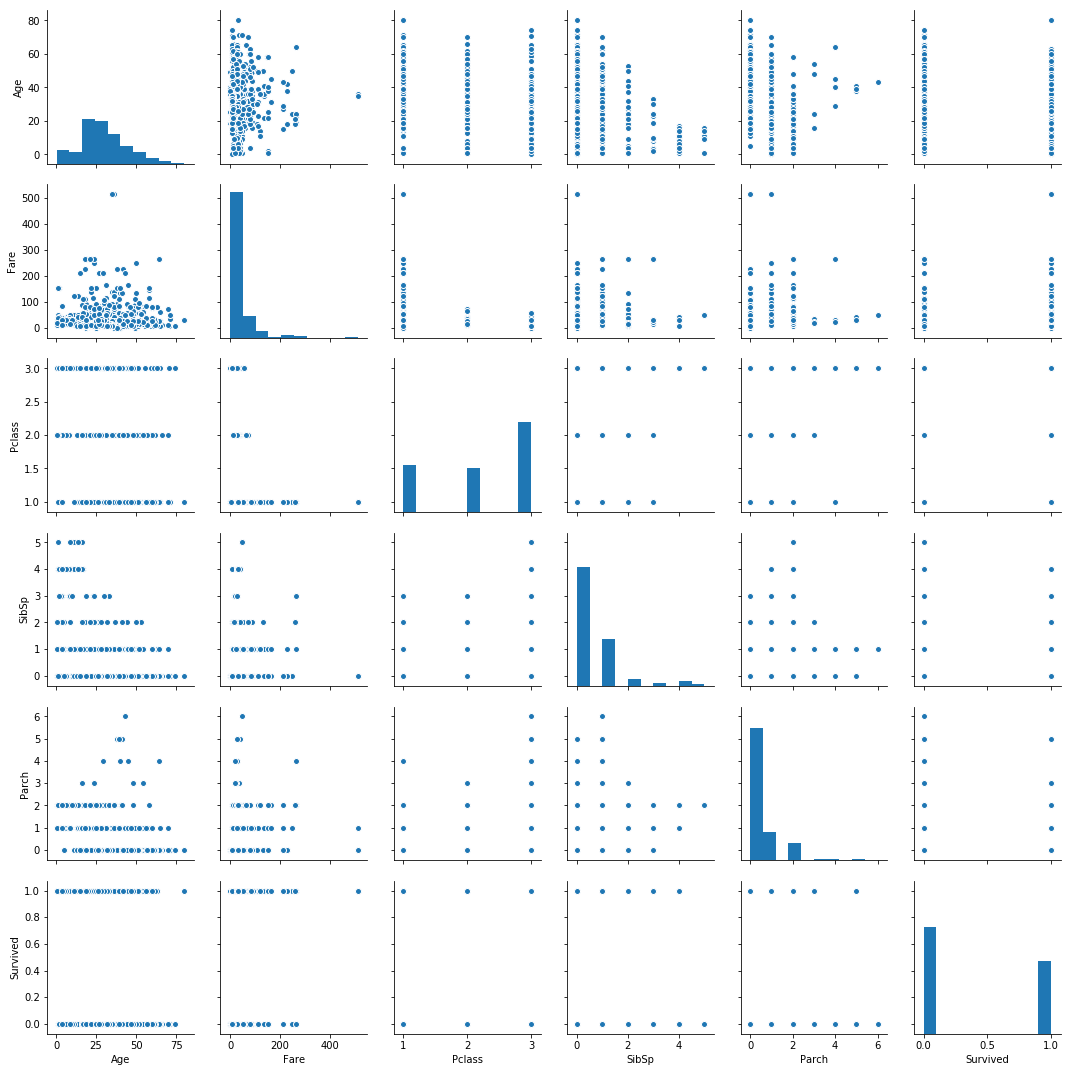

In [8]:
sns.pairplot(train_df[['Age' , 'Fare' , 'Pclass' , 'Sex' , 'SibSp' , 'Parch' , 'Embarked' , 'Survived']]);

Boxplot: как плата(Fare) зависит от класса каюты(Pclass)

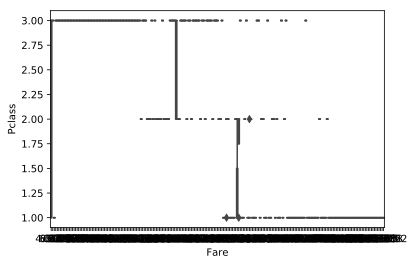

In [11]:
%config InlineBackend.figure_format = 'svg'
sns.boxplot(x = 'Fare' , y = 'Pclass' , data = train_df);


Каково соотношение погибших и выживших в зависимости от пола? Отобразите c помощью Seaborn.countplot c аргументом hue.

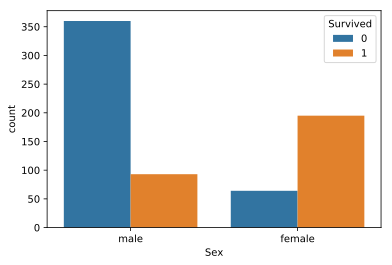

In [14]:
sns.countplot(x = 'Sex', hue = 'Survived', data = train_df);

# Каково соотношение погибших и выживших в зависимости от класса каюты? Отобразите c помощью Seaborn.countplot c аргументом hue

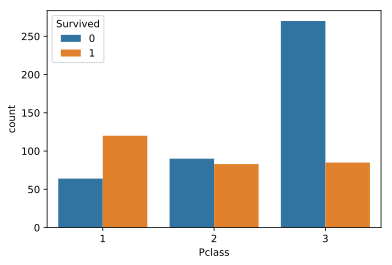

In [18]:
sns.countplot(x = 'Pclass' , hue = 'Survived', data = train_df);

# Как факт выживания зависит от возраста пассажира? Проверьте (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.

In [22]:
def age_category(age):
    if age < 30:
        return 1
    elif age > 60:
        return 2

In [23]:
age_categories = [age_category(age) for age in train_df['Age']]

In [24]:
train_df['AgeCat'] = age_categories

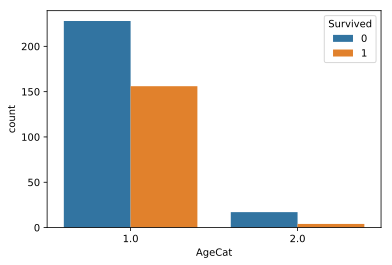

In [39]:
sns.countplot(x = 'AgeCat' , hue = 'Survived' , data = train_df)

In [40]:
pd.crosstab(train_df['AgeCat'] , train_df['Survived'])

Survived,0,1
AgeCat,,
1.0,228,156
2.0,17,4


Умерло 228 молодых, выжило 156. Умерло 17 пожилых, выжило 4.